La dinamica poblacional, es un sistema que evoluciona temporalmente, bajo parametros que miden ciertas cantidades presentes en la evolución de éste, un ejemplo de dinamica poblacional es el presentado por el modelo de lotka-volterra, en la cual se piensa en un sistema de ecuaciones que interpretan la evolucion de uno o varios individuos, en la cual uno de ellos depende del otro, este modelo es llamado "biomatematico" 

Las ecuaciones de Lotka-Volterra pretende responder la dinamica correspondiente a la evolucion temporal de una poblacion, bajo una cierta cantidad de particularidades, si sometemos el modelo a un sistema de ecuaciones que predice la dinamica de una poblacion que esta compuesta de presa-depredador, estas deberian responder a cuestiones prediciendo la dinámica de las poblaciones bajo una serie de hipótesis:

Las siguientes hipotesis son tomadas de "https://www.pybonacci.org/2015/01/05/ecuaciones-de-lotka-volterra-modelo-presa-depredador/?fbclid=IwAR20VR1l8G7xWjyQbgrOduFOfb43YT7ulzsX3qBa1q0OA-X11T1bBhjM2ug"


El ecosistema está aislado: no hay migración, no hay otras especies presentes, no hay plagas.

La población de presas en ausencia de depredadores crece de manera exponencial: la velocidad de reproducción es proporcional al número de individuos. Las presas sólo mueren cuando son cazadas por el depredador.

La población de depredadores en ausencia de presas decrece de manera exponencial.

La población de depredadores afecta a la de presas haciéndola decrecer de forma proporcional al número de presas y depredadores (esto es como decir de forma proporcional al número de posibles encuentros entre presa y depredador).

La población de presas afecta a la de depredadores también de manera proporcional al número de encuentros, pero con distinta constante de proporcionalidad (dependerá de cuanto sacien su hambre los depredadores al encontrar una presa).

Se trata de un sistema de dos ecuaciones diferenciales de primer orden, acopladas, autónomas y no lineales:
donde x es el número de presas (cebras en nuestro caso) e y es el número de depredadores (leones). 

Los parámetros son constantes positivas que representan:


$\begin{equation}
\frac{dx}{dt} = \alpha x -\beta xy
\end{equation}
$

$\begin{equation}
\frac{dy}{dt} = \gamma xy -\delta y
\end{equation}
$


$\alpha$: tasa de crecimiento de las presas.

$\beta$: éxito en la caza del depredador.

$\gamma$: tasa de decrecimiento de los depredadores.

$\delta$: éxito en la caza y cuánto alimenta cazar una presa al depredador.

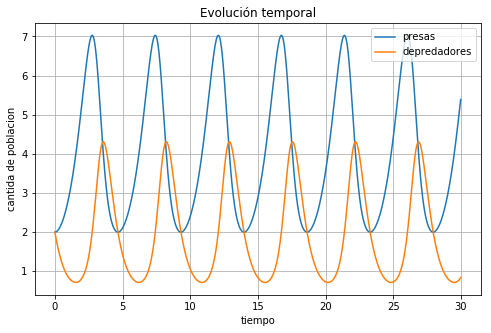

In [26]:
from matplotlib import pyplot as plt
from runge_kutta import Runge
import numpy as np

# solucion numerica de la ecuacion de lotja-volterra
# utilizando el metodo de runge-kutta de cuarto orden

# el sistema de ecuaciones es
# dx/dt = alpha*x-beta*x*y apha,beta = constantes
# dy/dt = gamma*x*y-delta*y gamma,delta = constantes

a = 1 #aplha
b = 0.5 #beta
c = 0.5 #gamma
d = 2 #delta
# realizando el cambio de variables para utilizar el metodo de runge-kutta
# de la clase Runge del metodo rk4N, se tiene
fun = []
fun.append('1*y[0]-0.5*y[0]*y[1]')
fun.append('0.5*y[0]*y[1]-2*y[1]')

ro = [2,2] # condicion inicial
h = 0.01 # tamaño del paso(bin)
tt = [0,30] # intervalo temporal

ode = Runge()
(t,r) = ode.rk4N(h,tt,ro,fun)
x = []
y = []
for i in r:
    x.append(i[0])
    y.append(i[1])
#plt.plot(t,r)
plt.figure("Evolución temporal", figsize=(8,5))
plt.title("Evolución temporal")
plt.plot(t,x,label = 'presas')
plt.plot(t,y,label = 'depredadores')
plt.xlabel('tiempo')
plt.ylabel('cantida de poblacion')
plt.legend()
plt.grid("on")
plt.show()


python contiene una funcion llamada odeint que pertenece a scipy "scipy.integrate.odeint() es un integrador de propósito general utilizando LSODA (Solucionador Livermore para Ecuaciones Diferenciales ordinarias con método Automático de conmutación para problemas rígidos y no rígidos), consultar http://people.sc.fsu.edu/~jburkardt/f77_src/odepack/odepack.html para más detalles.", para dar solucion a una ecuación diferencial de primer orden, podemos comparar la solucion obtenida anteriormente con la dada por odeint

In [27]:
# el siguiente codigo es tomado de https://www.pybonacci.org/2015/01/05/ecuaciones-de-lotka-volterra-modelo-presa-depredador/?fbclid=IwAR20VR1l8G7xWjyQbgrOduFOfb43YT7ulzsX3qBa1q0OA-X11T1bBhjM2ug
# en donde se propone hacer un cambio en los parametros con el fin de comparar con el resultado encontrado anteriormente
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

In [28]:
# sistema de ecuaciones
def df_dt(x, t, a, b, c, d):
    
    dx = a * x[0] - b * x[0] * x[1]
    dy = c * x[1] * x[0] - d * x[1]
    
    return np.array([dx, dy])

In [29]:
# Parámetros 
a = 1 #aplha
b = 0.5 #beta
c = 0.5 #gamma
d = 2 #delta

# Condiciones iniciales
x0 = 2
y0 = 2
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 30
N = 3000
t = np.linspace(0, tf, N)

In [30]:
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))

Text(0, 0.5, 'población')

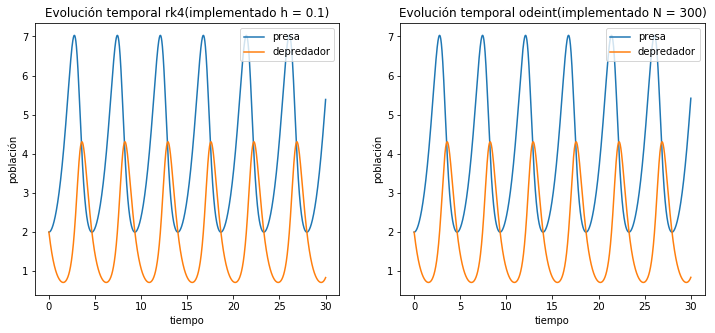

In [31]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)
ax[0].set_title("Evolución temporal rk4(implementado h = 0.1)")
ax[0].plot(t, x, label='presa')
ax[0].plot(t, y, label='depredador')
ax[0].set_xlabel('tiempo')
ax[0].set_ylabel('población')
ax[0].legend()

ax[1].set_title("Evolución temporal odeint(implementado N = 300)")
ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')

la implementacion del codigo rk4N en comparacion con odeint, a simple vista parece tener buena concordancia, lo cual implica que es confiable la solcuion encontarda con el codigo implementado, suponiendo que la diferencia entre las dos soluciones se encuentra en la sensibilidad del paso la diferencia de las dos soluiones deerian ser casi nulas

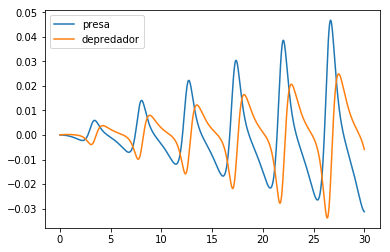

In [32]:
plt.plot(t, x-solucion[:, 0],label = 'presa')
plt.plot(t, y-solucion[:, 1], label = 'depredador')
plt.legend()

Text(0, 0.5, 'presa')

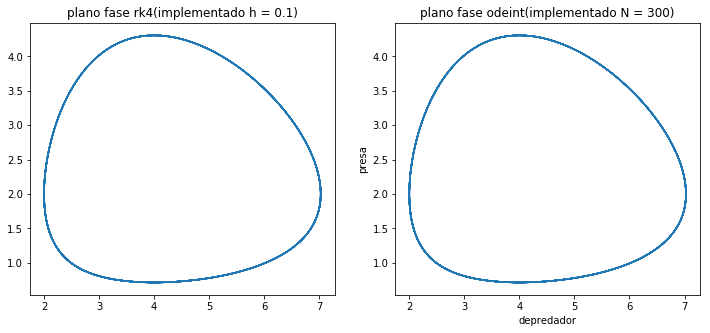

In [33]:
#plano fase
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)
ax[0].set_title("plano fase rk4(implementado h = 0.1)")
ax[0].plot(x,y)
ax[1].set_xlabel('depredador')
ax[1].set_ylabel('presa')

ax[1].set_title("plano fase odeint(implementado N = 300)")
ax[1].plot(solucion[:, 0],solucion[:,1])
ax[1].set_xlabel('depredador')
ax[1].set_ylabel('presa')

Es posible graficar también el campo de direcciones del sistema de  ecuaciones usando la función quiver. En donde el tamaño de las flechas se ha normalizado para que todas tengan la misma longitud y se ha usado un colormap para representar el módulo.

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'depredadores')

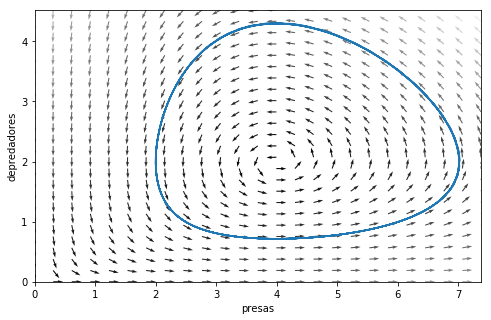

In [94]:
x_max = np.max(solucion[:,0]) * 1.05
y_max = np.max(solucion[:,1]) * 1.05

x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)

xx, yy = np.meshgrid(x, y)
uu, vv = df_dt((xx, yy), 0, a, b, c, d)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm

plt.figure("Campo de direcciones", figsize=(8,5))
plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
plt.plot(solucion[:, 0], solucion[:, 1])
plt.xlim(0, x_max)
plt.ylim(0, y_max)
plt.xlabel('presas')
plt.ylabel('depredadores')

Text(0, 0.5, 'población')

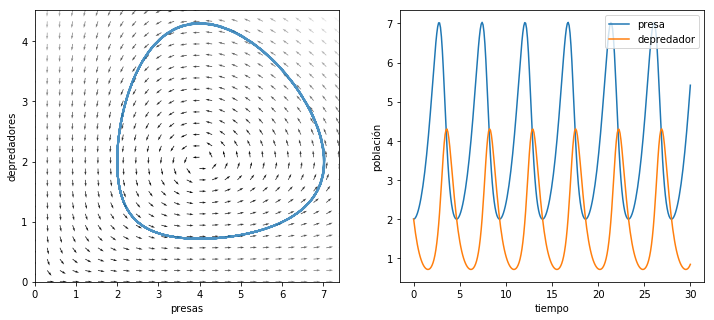

In [95]:
# comparar el plano fase con la solucion
n_max = np.max(solucion) * 1.10

fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)

ax[0].quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('presas')
ax[0].set_ylabel('depredadores')

ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')

In [96]:
def C(x, y, a, b, c, d):
    return a * np.log(y) - b * y + c * np.log(x) - d * x

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0, 0.5, 'depredadores')

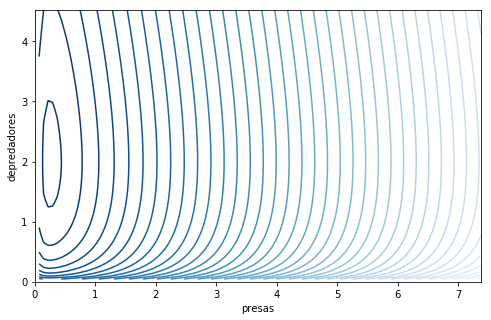

In [98]:
x = np.linspace(0, x_max, 100)
y = np.linspace(0, y_max, 100)
xx, yy = np.meshgrid(x, y)
constant = C(xx, yy, a, b, c, d)

plt.figure('distintas_soluciones', figsize=(8,5))
plt.contour(xx, yy, constant, 50, cmap=plt.cm.Blues)
plt.xlabel('presas')
plt.ylabel('depredadores')

Text(0, 0.5, 'población')

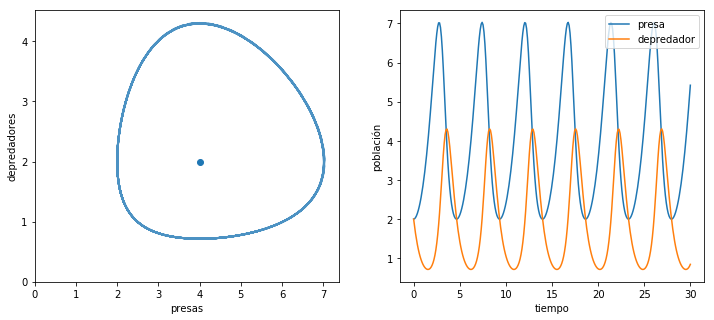

In [117]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)

ax[0].plot(solucion[:, 0], solucion[:, 1], lw=2, alpha=0.8)
ax[0].scatter(d/c, a/b)
levels = (0.5, 0.6, 0.7, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.775, 0.78, 0.781)
ax[0].contour(xx, yy, constant, levels, colors='blue', alpha=0.3)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('presas')
ax[0].set_ylabel('depredadores')

ax[1].plot(t, solucion[:, 0], label='presa')
ax[1].plot(t, solucion[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')

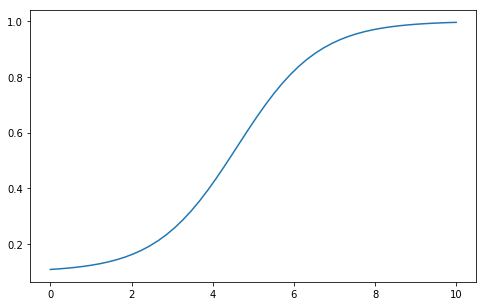

In [81]:
def logistic_curve(t, a=1, m=0, n=1, tau=1):
    e = np.exp(-t / tau)
    return a * (1 + m * e) / (1 + n * e) 
x_ = np.linspace(0,10)
plt.figure('función logística', figsize=(8,5))
plt.plot(x_, logistic_curve(x_, 1, m=10, n=100, tau=1))

C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
C:\Users\USUARIO\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, 'población')

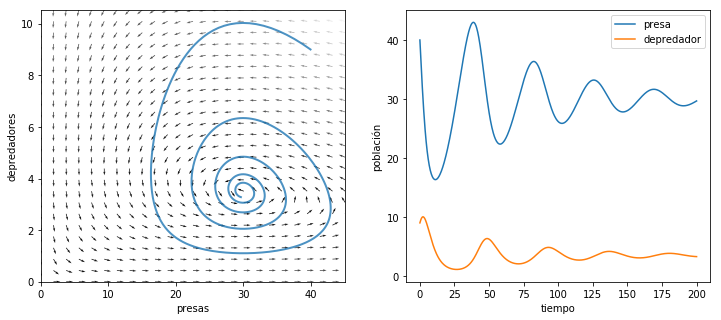

In [82]:
def df_dt_logistic(x, t, a, b, c, d, r):
    
    dx = a * x[0] - r * x[0]**2 - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    
    return np.array([dx, dy])
# Parámetros
a = 0.1
b = 0.02
c = 0.3
d = 0.01
r = 0.001

# Condiciones iniciales
x0 = 40
y0 = 9
conds_iniciales = np.array([x0, y0])

# Condiciones para integración
tf = 200
N = 800
t = np.linspace(0, tf, N)
solucion_logistic = odeint(df_dt_logistic, conds_iniciales, t, args=(a, b, c, d, r))
n_max = np.max(solucion) * 1.10

fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,5)

x_max = np.max(solucion_logistic[:,0]) * 1.05
y_max = np.max(solucion_logistic[:,1]) * 1.05

x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)

xx, yy = np.meshgrid(x, y)
uu, vv = df_dt_logistic((xx, yy), 0, a, b, c, d, r)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm

ax[0].quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
ax[0].plot(solucion_logistic[:, 0], solucion_logistic[:, 1], lw=2, alpha=0.8)
ax[0].set_xlim(0, x_max)
ax[0].set_ylim(0, y_max)
ax[0].set_xlabel('presas')
ax[0].set_ylabel('depredadores')

ax[1].plot(t, solucion_logistic[:, 0], label='presa')
ax[1].plot(t, solucion_logistic[:, 1], label='depredador')
ax[1].legend()
ax[1].set_xlabel('tiempo')
ax[1].set_ylabel('población')